In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

In [4]:
df=pd.read_csv('winequality.csv')

In [5]:
def pencilan (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    pencilan=[i for i in x if i>batasAtas or i<batasBawah]
    return pencilan

In [6]:
kolom=df.columns

In [7]:
outliers=[]

for i in kolom:
    outliers.append([i,len(pencilan(df[i]))])
pd.DataFrame(outliers, columns=['Nama Kolom', 'Jumlah Outlier'])

,Nama Kolom,Jumlah Outlier
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


# drop outliers

In [8]:
def IQR (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    return batasAtas, batasBawah

In [9]:
df2=df.copy()

In [10]:
for i in kolom:
    batasAtas, batasBawah=IQR(df2[f'{i}'])
    df2=df2[(df2[f'{i}']>batasBawah) & (df2[f'{i}']<batasAtas)]

In [11]:
normal=[]
for i in kolom:
    k2, p=stats.normaltest(df2[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

,k2,p-value,distribution
fixed acidity,91.649659,1.254670e-20,not normal
volatile acidity,15.479519,4.351761e-04,not normal
citric acid,161.412146,8.908362e-36,not normal
residual sugar,70.305428,5.412156e-16,not normal
chlorides,5.328567,6.964923e-02,normal
free sulfur dioxide,93.700312,4.500240e-21,not normal
total sulfur dioxide,118.165675,2.191037e-26,not normal
density,2.326830,3.124174e-01,normal
pH,6.531417,3.816989e-02,not normal
sulphates,51.981014,5.157820e-12,not normal


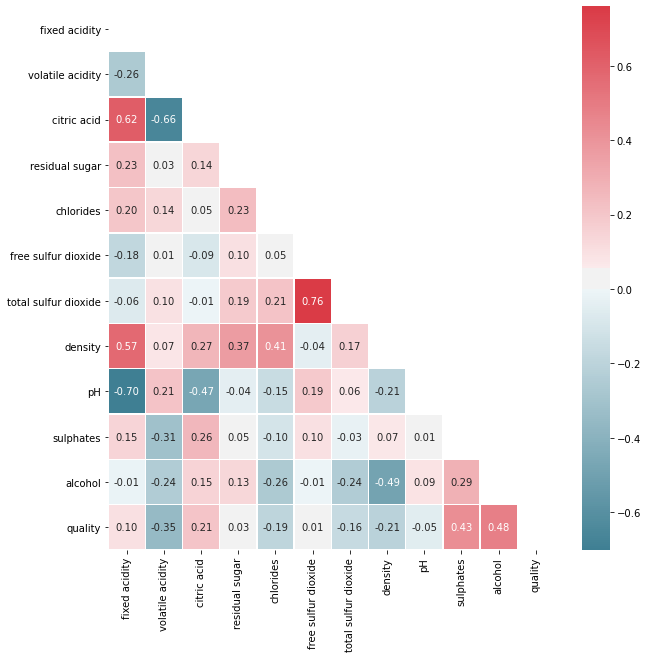

In [12]:
corr = df2.corr('spearman')
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# rescale

In [14]:
df3=df.copy()

In [30]:
for i in kolom:
    df3[f'{i}']=[(x**0.5) for x in df[f'{i}']]

In [28]:
normal=[]
for i in kolom:
    k2, p=stats.normaltest(df3[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

,k2,p-value,distribution
fixed acidity,114.401330,1.439020e-25,not normal
volatile acidity,4.286611,1.172666e-01,normal
citric acid,128.068116,1.550108e-28,not normal
residual sugar,1047.314496,3.789193e-228,not normal
chlorides,1298.917891,8.781401e-283,not normal
free sulfur dioxide,60.570731,7.034495e-14,not normal
total sulfur dioxide,93.275837,5.564284e-21,not normal
density,30.516818,2.362420e-07,not normal
pH,22.727413,1.160927e-05,not normal
sulphates,541.256757,2.934867e-118,not normal


In [31]:
df4=df.copy()

In [36]:
for i in kolom:
    df4[f'{i}']=[np.log(x+1) for x in df[f'{i}']]

In [37]:
normal=[]
for i in kolom:
    k2, p=stats.normaltest(df4[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

,k2,p-value,distribution
fixed acidity,52.133866,4.778316e-12,not normal
volatile acidity,21.023263,2.721802e-05,not normal
citric acid,433.144199,8.788853e-95,not normal
residual sugar,782.401021,1.269922e-170,not normal
chlorides,1644.008261,0.000000e+00,not normal
free sulfur dioxide,71.622836,2.800908e-16,not normal
total sulfur dioxide,79.122826,6.587137e-18,not normal
density,30.516799,2.362443e-07,not normal
pH,19.335381,6.329587e-05,not normal
sulphates,561.722630,1.055554e-122,not normal
